In [338]:
import numpy as np
import pandas as pd
import random as rand
import requests
import json
import re
from json import loads

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import math
import gurobipy as gp
from gurobipy import GRB

In [16]:
bus_station = pd.read_csv('서울시버스정류소좌표데이터(2022.08.24).csv', encoding='euc-kr')
bus_station = bus_station.sample(n=100)
bus_station

,NODE_ID,ARS-ID,정류소명,좌표X,좌표Y
5534,113900260,14492,마포16번종점,126.898872,37.560871
3410,108900273,9950,한국전력공사,127.024706,37.630537
5676,113900093,14712,마포전철역,126.944496,37.539652
11105,124900042,25589,서울암사동유적,127.130895,37.559310
3236,108900121,9554,삼양부동산,127.018033,37.624911
...,...,...,...,...,...
6940,116000129,17219,고척근린시장,126.850843,37.501135
7866,118000200,19286,여의도한양아파트,126.932015,37.520890
5632,113900002,14602,월드컵파크4단지,126.887608,37.577790
3281,108900089,9754,성당앞,127.021990,37.642288


# routing matrix

In [55]:
num = 20 # 총 노드 개수

# for i in range(0,num):
#     globals()[f'loc{i}_name'] = bus_station.iloc[i,2]
#     globals()[f'loc{i}_X'] = bus_station.iloc[i,3]
#     globals()[f'loc{i}_Y'] = bus_station.iloc[i,4]

loc_info = {i: [bus_station.iloc[i,j] for j in [2,3,4]] for i in range(num)}

# print(loc0_name, loc0_X, loc0_Y)
loc_info

{0: ['마포16번종점', 126.898871638, 37.5608710949],
 1: ['한국전력공사', 127.0247055174, 37.630537192],
 2: ['마포전철역', 126.9444963085, 37.5396518925],
 3: ['서울암사동유적', 127.1308948373, 37.5593095135],
 4: ['삼양부동산', 127.01803349, 37.624911397],
 5: ['수궁119안전센터', 126.8295004749, 37.4968393286],
 6: ['미아리고개.미아리예술극장', 127.0217897651, 37.5979233522],
 7: ['우이성당', 127.0156935104, 37.6560215642],
 8: ['마장역', 127.0430045293, 37.5660485743],
 9: ['디지텍고등학교앞', 126.991800907, 37.5397807393],
 10: ['이촌2동대림아파트.새남터성지', 126.9562314358, 37.5260689531],
 11: ['강서노인회관', 126.8395233847, 37.554536925],
 12: ['대성병원', 126.9099866163, 37.5122667827],
 13: ['태영송화아파트', 126.867561451, 37.5539425244],
 14: ['그린마트', 126.916089012, 37.6245969164],
 15: ['고미술상가', 127.0574527443, 37.5634751321],
 16: ['상계6동우체국', 127.0588315522, 37.6538101151],
 17: ['강명초등학교.고덕리엔파크3단지', 127.1732468133, 37.5538603418],
 18: ['건설환경종합연구소앞', 126.9498675493, 37.4471447583],
 19: ['현대아파트', 126.8960514294, 37.5230720608]}

In [43]:
str(loc_info[0][1])

'126.898871638'

In [45]:
url = "https://apis.openapi.sk.com/tmap/matrix?version=1"

payload = {
    "origins": [
        {
            "lon": str(loc_info[i][1]),
            "lat": str(loc_info[i][2])
        } for i in range(num)
    ],
    "destinations": [
        {
            "lon": str(loc_info[i][1]),
            "lat": str(loc_info[i][2])
        } for i in range(num)
    ],
    "transportMode": "car",
    "metric": "Recommendation"
}
headers = {
    "Accept": "application/json",
    "appKey": "l7xx4d23b06a733d4f2e9c5365ca49c3431a",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

In [18]:
# url = "https://apis.openapi.sk.com/tmap/matrix?version=1"
#
# payload = {
#     "origins": [
#         {
#             "lon": str(globals()[f'loc{i}_X']),
#             "lat": str(globals()[f'loc{i}_Y']),
#         } for i in range(num)
#     ],
#     "destinations": [
#         {
#             "lon": str(globals()[f'loc{i}_X']),
#             "lat": str(globals()[f'loc{i}_Y']),
#         } for i in range(num)
#     ],
#     "transportMode": "car",
#     "metric": "Recommendation"
# }
# headers = {
#     "Accept": "application/json",
#     "appKey": "l7xx4d23b06a733d4f2e9c5365ca49c3431a",
#     "Content-Type": "application/json"
# }
#
# response = requests.post(url, json=payload, headers=headers)

In [48]:
jsonObj = json.loads(response.text)
jsonObj

{'meta': {'status': 'Ok',
  'message': 'Ok',
  'moduleVersion': '',
  'mapVersion': '20230221',
  'elapsedTime': 0,
  'realTimeTrafficDateTime': '',
  'patternTrafficDate': '',
  'customizationDateTime': '',
  'algorithm': '',
  'metric': 'Recommendation',
  'requestId': 'b2d87e03-12b2-445d-9e2a-657bb6b3d484',
  'gasStationPriceDateTime': '',
  'transportMode': 'Car',
  'avoid': []},
 'origins': [{'link': {'linkId': '0', 'direction': 'TwoWay'},
   'poiId': '',
   'name': '',
   'coordinate': {'latitude': 37.5608710949, 'longitude': 126.898871638},
   'rpFlag': ''},
  {'link': {'linkId': '0', 'direction': 'TwoWay'},
   'poiId': '',
   'name': '',
   'coordinate': {'latitude': 37.630537192, 'longitude': 127.0247055174},
   'rpFlag': ''},
  {'link': {'linkId': '0', 'direction': 'TwoWay'},
   'poiId': '',
   'name': '',
   'coordinate': {'latitude': 37.5396518925, 'longitude': 126.9444963085},
   'rpFlag': ''},
  {'link': {'linkId': '0', 'direction': 'TwoWay'},
   'poiId': '',
   'name': '

In [49]:
jsonObj['matrixRoutes'][0]

{'status': 'Ok',
 'originIndex': 0,
 'destinationIndex': 0,
 'cost': 0,
 'duration': 0,
 'distance': 0.0,
 'toll': False}

In [173]:
duration_lst = []
distance_lst = []
for i in range(num**2):
    duration_lst.append(jsonObj['matrixRoutes'][i]['duration'])
    distance_lst.append(jsonObj['matrixRoutes'][i]['distance'])
duration = pd.DataFrame(np.array(duration_lst).reshape(num,num))
distance = pd.DataFrame(np.array(distance_lst).reshape(num,num))
print(duration.shape)
duration

(20, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,2101,1078,2199,1844,1525,1642,2681,1787,1563,956,1224,909,751,1683,1998,2225,2492,2087,995
1,2467,0,2508,2425,547,3326,1190,735,2007,2576,2231,2914,2480,2467,2331,1734,780,2380,3471,2565
2,808,2177,0,1843,1920,1699,1718,2757,1431,1207,600,1346,707,910,1739,1641,2143,2136,1731,954
3,2210,2467,1851,0,2550,2847,2259,2788,1308,1501,1575,2784,2261,2316,2770,1171,1846,768,2909,2468
4,2033,297,2236,2152,0,2892,846,875,1569,2317,1959,2480,2046,2033,1897,1869,1094,2389,3199,2131
5,1859,3256,1618,3058,2998,0,2796,3835,2504,2263,2398,1414,1734,1676,2817,2715,3379,3387,2405,1394
6,1853,700,1835,1751,817,2712,0,1434,1168,1973,1558,2300,1866,1853,1717,1468,1464,1988,2798,1951
7,2814,1175,2754,2671,881,3673,1690,0,2253,2822,2478,3261,3044,2814,2678,1981,950,2226,3718,2912
8,1643,1736,1283,1200,1819,2534,1220,2474,0,1351,1007,2181,1573,1745,2039,503,1532,1492,2247,1819
9,1474,2367,1162,1858,2484,1901,1667,2912,1258,0,838,1838,1315,1370,2336,1468,1970,2188,2014,1522


In [174]:
print(distance.shape)
distance

(20, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,21517.2,7694.7,29021.6,19149.1,13760.0,17867.8,23004.5,21068.7,12350.4,8374.2,9240.5,7311.7,5610.8,9929.2,23548.4,27831.5,35736.0,17877.5,6033.5
1,19152.1,0.0,30695.0,32188.9,2469.3,30172.1,6618.5,3704.5,15474.3,26991.7,28469.3,25579.2,25232.0,22415.8,17321.0,15298.2,4699.8,24996.8,35893.4,23953.8
2,7492.1,24535.7,0.0,24183.0,22167.6,17641.2,20886.3,26023.0,16230.1,7511.8,3535.6,12890.9,4529.8,8977.8,16616.8,18709.8,27914.4,30897.4,13038.9,5457.5
3,30033.5,25250.5,24510.6,0.0,25385.9,36416.2,24588.8,23238.9,17384.8,18253.6,22284.9,34299.0,26563.7,30977.5,36081.8,8576.8,18665.1,9304.0,33561.1,28374.9
4,16928.5,1245.1,24001.8,25495.7,0.0,27948.5,4051.5,4081.7,9226.4,12392.2,21776.1,23355.6,23008.4,20192.2,15097.4,10245.6,5812.1,23175.4,29200.2,21730.2
5,14541.3,31508.1,14990.5,36905.1,29140.0,0.0,27858.7,32995.4,30897.8,24628.0,17465.1,8795.9,10155.2,10962.1,23589.2,33377.5,37822.4,43484.3,16291.8,8097.4
6,17276.3,3984.8,22349.4,23843.3,3343.8,28296.3,0.0,7689.3,7574.0,9593.0,20123.7,23703.4,23356.2,20540.0,15445.2,8593.2,8383.3,21523.0,27547.8,22078.0
7,20783.9,5098.9,32508.9,34002.8,4081.7,31803.9,8070.4,0.0,17288.2,28805.6,30283.2,27211.0,35282.0,24047.6,18952.8,17112.1,4541.3,30625.4,37707.3,25585.6
8,21609.5,9257.9,16086.6,17580.5,9393.3,31758.6,5760.3,17617.8,0.0,12383.3,13860.9,27008.3,18859.7,23095.2,20089.2,2068.1,13044.0,24294.9,21285.0,19787.4
9,15497.4,12753.3,5599.1,20972.6,12112.3,24140.6,8768.5,28646.2,12388.1,0.0,7748.8,22023.4,14288.1,18701.9,14100.0,14867.8,24072.4,27551.8,16501.6,16099.3


In [175]:
addr_info = {bus_station.iloc[i,2] : {'no': i, 'lon': bus_station.iloc[i,3], 'lat': bus_station.iloc[i,4]} for i in range(num)}
addr_info

{'마포16번종점': {'no': 0, 'lat': 126.898871638, 'lon': 37.5608710949},
 '한국전력공사': {'no': 1, 'lat': 127.0247055174, 'lon': 37.630537192},
 '마포전철역': {'no': 2, 'lat': 126.9444963085, 'lon': 37.5396518925},
 '서울암사동유적': {'no': 3, 'lat': 127.1308948373, 'lon': 37.5593095135},
 '삼양부동산': {'no': 4, 'lat': 127.01803349, 'lon': 37.624911397},
 '수궁119안전센터': {'no': 5, 'lat': 126.8295004749, 'lon': 37.4968393286},
 '미아리고개.미아리예술극장': {'no': 6, 'lat': 127.0217897651, 'lon': 37.5979233522},
 '우이성당': {'no': 7, 'lat': 127.0156935104, 'lon': 37.6560215642},
 '마장역': {'no': 8, 'lat': 127.0430045293, 'lon': 37.5660485743},
 '디지텍고등학교앞': {'no': 9, 'lat': 126.991800907, 'lon': 37.5397807393},
 '이촌2동대림아파트.새남터성지': {'no': 10, 'lat': 126.9562314358, 'lon': 37.5260689531},
 '강서노인회관': {'no': 11, 'lat': 126.8395233847, 'lon': 37.554536925},
 '대성병원': {'no': 12, 'lat': 126.9099866163, 'lon': 37.5122667827},
 '태영송화아파트': {'no': 13, 'lat': 126.867561451, 'lon': 37.5539425244},
 '그린마트': {'no': 14, 'lat': 126.916089012, 'lon': 37

# 출발지 동일

## 샘플 생성

In [427]:
# same src & diff dst + 탑승인원 3명
def dist(addr):
    return (addr_info[addr]['lat']**2 + addr_info[addr]['lon']**2)**1/2

while(True):
    passenger_sample = rand.sample(list(addr_info.keys()), 4)
    a,b,c,dst = passenger_sample
    if max(dist(a), dist(b), dist(c), dist(dst))==dist(dst) or min(dist(a), dist(b), dist(c),dist(dst))==dist(dst):
        # if
        break
pass_2_node = {'a': a, 'b': b, 'c': c, 'dst':dst}
node_2_pass = {a: 'a', b: 'b', c: 'c', dst: 'dst'}
print(pass_2_node)
print(node_2_pass)

{'a': '한국전력공사', 'b': '미아리고개.미아리예술극장', 'c': '강명초등학교.고덕리엔파크3단지', 'dst': '그린마트'}
{'한국전력공사': 'a', '미아리고개.미아리예술극장': 'b', '강명초등학교.고덕리엔파크3단지': 'c', '그린마트': 'dst'}


## 경로 설정

In [428]:
passenger_sample

['한국전력공사', '미아리고개.미아리예술극장', '강명초등학교.고덕리엔파크3단지', '그린마트']

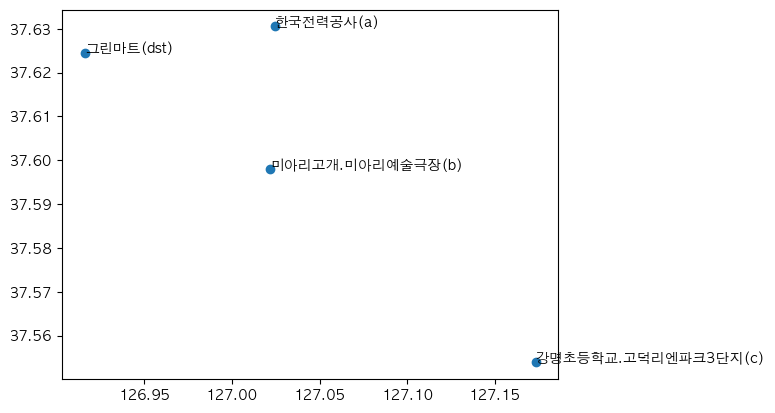

In [429]:
lat = [addr_info[addr]['lat'] for addr in passenger_sample]
lon = [addr_info[addr]['lon'] for addr in passenger_sample]
addr = [f'{pas}({node_2_pass[pas]})' for pas in passenger_sample]

fig, ax = plt.subplots()
ax.scatter(lat, lon)
for i, txt in enumerate(addr):
    ax.annotate(txt, (lat[i], lon[i]))
plt.show()

In [430]:
rout = [[addr,dist(addr)] for addr in passenger_sample]
rout.sort(key=lambda  x: x[1], reverse=True)
if rout[0][0]== passenger_sample[-1]:
    rout.sort(key=lambda  x: x[1], reverse=True)
routing = {addr: {'node':node_2_pass[addr],'no':addr_info[addr]['no']} for addr,dis in rout}
print(rout)
print(routing)

[['강명초등학교.고덕리엔파크3단지', 8791.663565803969], ['한국전력공사', 8775.666570570342], ['미아리고개.미아리예술극장', 8774.069457763584], ['그린마트', 8761.651971611742]]
{'강명초등학교.고덕리엔파크3단지': {'node': 'c', 'no': 17}, '한국전력공사': {'node': 'a', 'no': 1}, '미아리고개.미아리예술극장': {'node': 'b', 'no': 6}, '그린마트': {'node': 'dst', 'no': 14}}


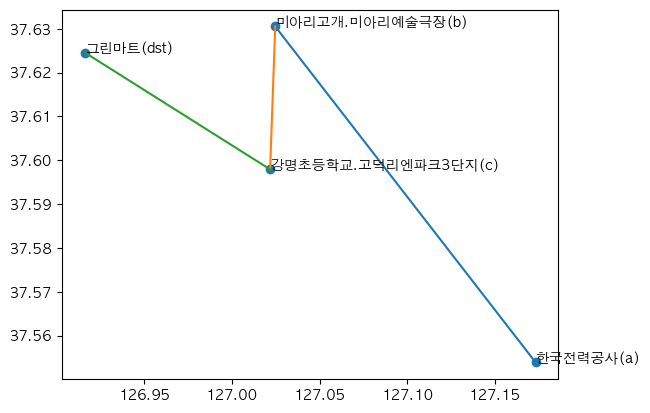

In [431]:
lat = [addr_info[rou]['lat'] for rou in routing]
lon = [addr_info[rou]['lon'] for rou in routing]

fig, ax = plt.subplots()
ax.scatter(lat, lon)
for i, txt in enumerate(routing):
    try:
        ax.plot([lat[i], lat[i+1]], [lon[i], lon[i+1]])
    except: pass
for i, txt in enumerate(addr):
    ax.annotate(txt, (lat[i], lon[i]))
plt.show()

In [432]:
no_a, no_b, no_c, no_dst = routing.values()
no_a

{'node': 'c', 'no': 17}

In [433]:
no_routing = [addr_info[addr]['no'] for addr in routing]
no_routing

[17, 1, 6, 14]

## 요금산정

In [434]:
new_distance = distance.iloc[no_routing,no_routing]
new_duration = duration.iloc[no_routing,no_routing]
new_distance

,17,1,6,14
17,0.0,24170.5,23508.8,35194.2
1,24996.8,0.0,6618.5,17321.0
6,21523.0,3984.8,0.0,15445.2
14,33759.7,17643.0,13993.6,0.0


In [440]:
"""
[2021년 서울 차량 통행속도 분석]에 따르면 지난해 도심 통행속도는 시속 23㎞'라는 정보를 활용해 시간을 산출하였다.
"""

def taxi_fee(meter, second):
    return int(4800+(meter-1600)*1.31+(second-3600/23000*1600)*10/3)

individual_distance = [new_distance.loc[no_routing[i], no_routing[-1]] for i in range(len(no_routing)-1)]
individual_duration = [new_duration.loc[no_routing[i], no_routing[-1]] for i in range(len(no_routing)-1)]

routing_distance = [new_distance.loc[no_routing[num],no_routing[num+1]] for num in range(len(no_routing)-1)]
routing_duration = [new_duration.loc[no_routing[num],no_routing[num+1]] for num in range(len(no_routing)-1)]
individual_cost = [taxi_fee(individual_distance[i],individual_duration[i]) for i in range(len(no_routing)-1)]

total_distance = sum(routing_distance)
total_duration = sum(routing_duration)

total_cost = taxi_fee(total_distance, total_duration)

routing_individual_distance = [sum(routing_distance[i:]) for i in range(len(no_routing)-1)]
routing_individual_duration = [sum(routing_duration[i:]) for i in range(len(no_routing)-1)]

delay_ratio = [(routing_individual_duration[i]-individual_duration[i])/individual_duration[i] for i in range(len(no_routing)-1)]

In [441]:
I1, I2, I3 = individual_cost
R1, R2, R3 = delay_ratio
T = total_cost
eplison = 0.03
gamma = 0.05

LB = 0.3
UB = 0.5

## matching ALGorithm
try:
  # Create a new model
  m = gp.Model('cost_optimization1')

  # Create variables
  alpha = m.addVar(vtype=GRB.CONTINUOUS, name='alpha')
  beta = m.addVar(vtype=GRB.CONTINUOUS, name='beta')

  # Set objective
  m.setObjective(I1*(1-(alpha+beta*R1))+I2*(1-(alpha+beta*R2))+I3*(1-(alpha+beta*R3))-T, GRB.MINIMIZE)

  # Add constraint
  m.addConstr(max(R1,R2,R3)*beta-UB*alpha <= 0,'const_1')
  m.addConstr(max(R1,R2,R3)*beta-LB*alpha >= 0,'const_2')
  m.addConstr(I1*(1-(alpha+beta*R1))+I2*(1-(alpha+beta*R2))+I3*(1-(alpha+beta*R3))-T >= 0,'const_3')

  m.addConstr(alpha <= 0.5)
  m.addConstr(alpha >= 0)
  m.addConstr(beta <= 0.5)
  m.addConstr(beta >= 0)
  #m.addConstr(gamma <= 1)

  # Optimize model
  m.optimize()

  for v in m.getVars():
    print('%s : %g' % (v.varName, v.x))
    globals()[v.varName] = v.x
  print('Obj : %g' % m.objVal)

except gp.GurobiError as e:
  print('Error code ' + str(e.errno) + ': ' + str(e))

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 2 columns and 10 nonzeros
Model fingerprint: 0x3fb3b541
Coefficient statistics:
  Matrix range     [3e-01, 1e+05]
  Objective range  [5e+04, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-01, 4e+04]
Presolve removed 4 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1038248e+04   4.311815e+01   0.000000e+00      0s
       2    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
alpha : 0.274932
beta : 0.101008
Obj : 0


In [442]:
print(f'A {alpha*100:.2f}+{beta*R1*100:.2f} => {(alpha+beta*R1)*100:.2f}% 할인')
print(f'B {alpha*100:.2f}+{beta*R2*100:.2f} => {(alpha+beta*R2)*100:.2f}% 할인')
print(f'C {alpha*100:.2f}+{beta*R3*100:.2f} => {(alpha+beta*R3)*100:.2f}% 할인')
print()
print(f'A {I1} 원 >>> {int((1-alpha+beta*R1)*I1)} 원')
print(f'B {I2} 원 >>> {int((1-alpha+beta*R2)*I2)} 원')
print(f'C {I3} 원 >>> {int((1-alpha+beta*R3)*I3)} 원')

routing_individual_cost = [int((1-alpha+beta*R1)*I1),int((1-alpha+beta*R2)*I2),int((1-alpha+beta*R3)*I3)]

A 27.49+8.25 => 35.74% 할인
B 27.49+2.50 => 29.99% 할인
C 27.49+0.00 => 27.49% 할인

A 57513 원 >>> 46444 원
B 32329 원 >>> 24247 원
C 27825 원 >>> 20175 원


In [443]:
print('혼자탔을 때')
print(f'합계 : {sum(individual_cost)} 원')
print([f'{rou} 원' for rou in individual_cost])
print([f'{rou/1000:.2f} km' for rou in indivial_distance])
print([f'{rou/60:.2f} 분' for rou in indivial_duration])
print()
print('동승시')
print(f'합계 : {total_cost} 원')
print([f'{rou} 원' for rou in routing_individual_cost])
print([f'{rou/1000:.2f} km' for rou in routing_individual_distance])
print([f'{rou/60:.2f} 분' for rou in routing_individual_duration])

혼자탔을 때
합계 : 117667 원
['57513 원', '32329 원', '27825 원']
['35.19 km', '17.32 km', '15.45 km']
['47.70 분', '38.85 분', '28.62 분']

동승시
합계 : 79766 원
['46444 원', '24247 원', '20175 원']
['46.23 km', '22.06 km', '15.45 km']
['86.65 분', '48.45 분', '28.62 분']


In [444]:
# """
# [2021년 서울 차량 통행속도 분석]에 따르면 지난해 도심 통행속도는 시속 23㎞'라는 정보를 활용해 시간을 산출하였다.
# """
#
# def taxi_fee(meter, second):
#     return int(4800+(meter-1600)*1.31+(second-3600/23000*1600)*10/3)
#
# a_ind_pred = taxi_fee(new_distance.loc[no_routing[0],no_routing[-1]],new_duration.loc[no_routing[0],no_routing[-1]])
# b_ind_pred = taxi_fee(new_distance.loc[no_routing[1],no_routing[-1]],new_duration.loc[no_routing[1],no_routing[-1]])
# c_ind_pred = taxi_fee(new_distance.loc[no_routing[2],no_routing[-1]],new_duration.loc[no_routing[2],no_routing[-1]])
#
# total_distance = 0
# total_duration = 0
# for num in range(len(no_routing)):
#     try:
#         print(f'{no_routing[num]} -> {no_routing[num+1]} : {taxi_fee(new_distance.loc[no_routing[num],no_routing[num+1]],new_duration.loc[no_routing[num],no_routing[num+1]])} 원 ({new_distance.loc[no_routing[num],no_routing[num+1]]} m)')
#         total_distance += new_distance.loc[no_routing[num],no_routing[num+1]]
#         total_duration += new_duration.loc[no_routing[num],no_routing[num+1]]
#     except:
#         pass
#
# driver_rou_pred = taxi_fee(total_distance, total_duration)
# # print(new_distance.loc[no_a['no'],no_dst['no']])
# print()
# print('혼자탔을 때 내야하는 비용')
# print(f'a 비용 : {a_ind_pred} 원 ({new_distance.loc[no_routing[0],no_routing[-1]]} m) / b 비용 : {b_ind_pred} 원 ({new_distance.loc[no_routing[1],no_routing[-1]]} m) / c 비용 : {c_ind_pred} 원 ({new_distance.loc[no_routing[2],no_routing[-1]]} m)')
# print()
# print('같이 탔을 때 총 비용')
# print(f'전체 비용 : {driver_rou_pred} 원 {total_distance}, {total_duration}')
# print()
# print(f'save 비용 : {a_ind_pred+b_ind_pred+c_ind_pred-driver_rou_pred}원')